In [12]:
from sklearn.datasets import load_digits
digits=load_digits()

In [13]:
print("image data shape",digits.data.shape)
print("label data shape",digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

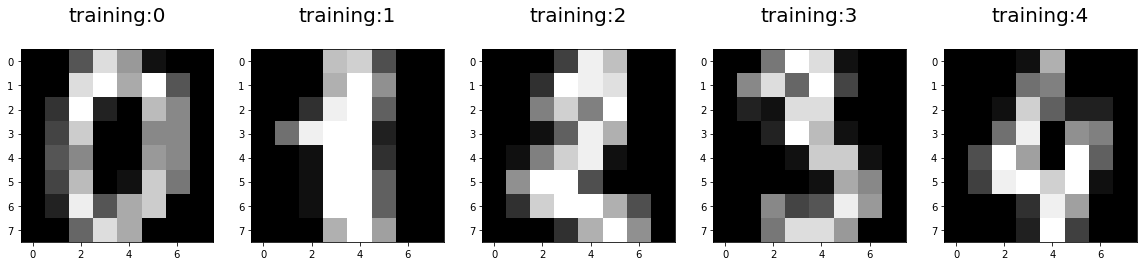

In [15]:
plt.figure(figsize=(20,4))
for index,(image,label)in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training:%i\n'%label,fontsize=20)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3,random_state=0)

In [51]:
print(x_train.shape)

(1257, 64)


In [52]:
print(y_train.shape)

(1257,)


In [53]:
print(x_test.shape)

(540, 64)


In [54]:
print(y_test.shape)

(540,)


In [55]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\sasik\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [58]:
#returns a numpy array
#predict one observation

print(logreg.predict(x_test[0].reshape(1,-1)))

[2]


In [59]:
logreg.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [60]:
predictions = logreg.predict(x_test)

In [61]:
score = logreg.score(x_test,y_test)
print(score)

0.9537037037037037


In [62]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  1]
 [ 0  2 49  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  0  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  1  0  0 51  0  0]
 [ 0  3  1  0  0  0  0  0 53  4]
 [ 0  0  0  0  0  1  0  0  1 55]]


Text(0.5, 1.0, 'Accuracy Score;0.9537037037037037')

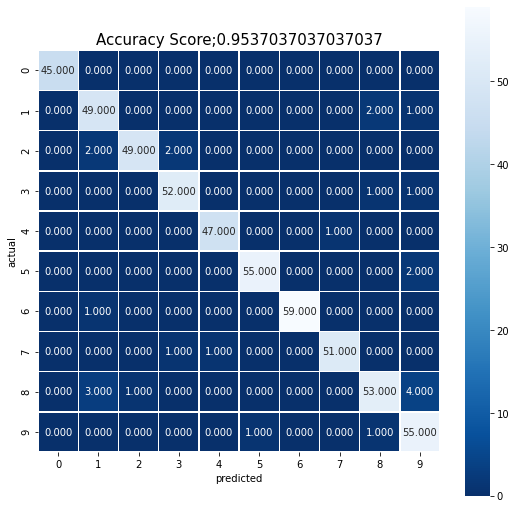

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('predicted');
plt.ylabel('actual');
all_sample_title= 'Accuracy Score;{0}'.format(score)
plt.title(all_sample_title,size=15)

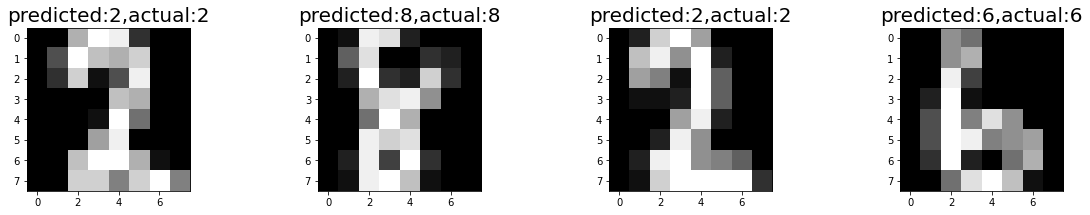

In [68]:
index=0
misclassifiedIndex=[]
for predict,actual in zip(predictions,y_test):
    if predict==actual:
        misclassifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted:{},actual:{}".format(predictions[wrong],y_test[wrong]),fontsize=20)